## Code rencontre les données 

Nous discuterons également des méthodes efficaces de gestion du code source pour l'apprentissage automatique (ML), explorerons les caractéristiques de qualité des données, et analyserons et façonnerons les données pour une solution ML. la Solution MLOps pour cela. Ensuite, nous mettrons en place les ressources et les outils nécessaires à la mise en œuvre de la solution. 10 principes directeurs pour la gestion du code source pour le ML sont discutés pour appliquer des pratiques de code propre.

 Nous discuterons de ce qui constitue des données de bonne qualité pour le ML et bien plus encore, suivi du traitement d'un ensemble de données lié au problème métier et de son ingestion et de sa version dans l'espace de travail ML. La majeure partie du chapitre est pratique et conçue pour vous donner une bonne compréhension et une bonne expérience des MLOps. Pour cela, nous allons couvrir les principaux sujets suivants dans ce chapitre

* Analyse des problèmes commerciaux et catégorisation du problème

* Configuration des ressources et des outils
* 10 principes de gestion du code source pour l'apprentissage automatique

* Bonnes données pour l'apprentissage automatique
* Prétraitement des données
* Enregistrement des données et gestion des versions
* Vers un pipeline ML


Sans plus tarder, passons à la démystification du problème métier et à la mise en œuvre de la solution en utilisant une approche MLOps

## Analyse des problèmes commerciaux et catégorisation du problème 

Dans le chapitre précédent, nous avons examiné l'énoncé du problème commercial suivant. Dans cette section, nous allons démystifier l'énoncé du problème en le catégorisant en utilisant les principes pour organiser une feuille de route de mise en œuvre. Nous jetterons un coup d'œil sur l'ensemble de données qui nous est fourni pour résoudre le problème commercial et déciderons du type de modèle de ML qui résoudra le problème commercial de manière efficace. Enfin, nous catégoriserons l'approche MLOps pour la mise en œuvre d'opérations de ML robustes et évolutives et déciderons des outils de mise en œuvre.



    Voici l'énoncé du problème : 
    
    Vous travaillez en tant que data scientist avec une petite équipe de data scientists 
    pour une entreprise de transport de fret basée en Finlande. 90% des
    marchandises sont importées en Finlande via le transport maritime de
    marchandises. 
    
    Vous êtes chargé d'économiser 20 % des coûts des opérations de fret au port
    de Turku, en Finlande. Cela peut être réalisé en développant une solution
    ML qui prédit les conditions météorologiques au port 4 heures à l'avance.
    
    Vous devez surveiller d'éventuelles conditions pluvieuses, qui peuvent
    fausser les opérations au port avec les ressources humaines et le
    transport, ce qui à son tour affecte les opérations de la chaîne
    d'approvisionnement au port. Votre solution de ML aidera les autorités
    portuaires à prévoir d'éventuelles pluies 4 heures à l'avance ; cela
    permettra d'économiser 20 % des coûts et de permettre le bon fonctionnement
    de la chaîne d'approvisionnement au port



La première étape pour résoudre un problème consiste à le simplifier et à le catégoriser en utilisant une approche appropriée. 

Dans le chapitre précédent, nous avons expliqué comment catégoriser un problème métier pour le résoudre à l'aide de ML. Appliquons ces principes pour tracer une feuille de route claire pour sa mise en œuvre. Tout d'abord, nous verrons quel type de modèle nous formerons pour générer la valeur commerciale maximale.

 Dans un deuxième temps, nous identifierons la bonne approche pour notre implémentation MLOps. Afin de décider du type de modèle à former, nous pouvons commencer par jeter un œil au jeu de données disponible sur GitHub : https://github.com/PacktPublishing/EngineeringMLOps .
 
 Voici un instantané de weather_dataset_raw.csv, dans la figure 3.1. La taille du fichier est de 10,7 Mo, le nombre de lignes est de 96 453 et le fichier est au format CSV :

 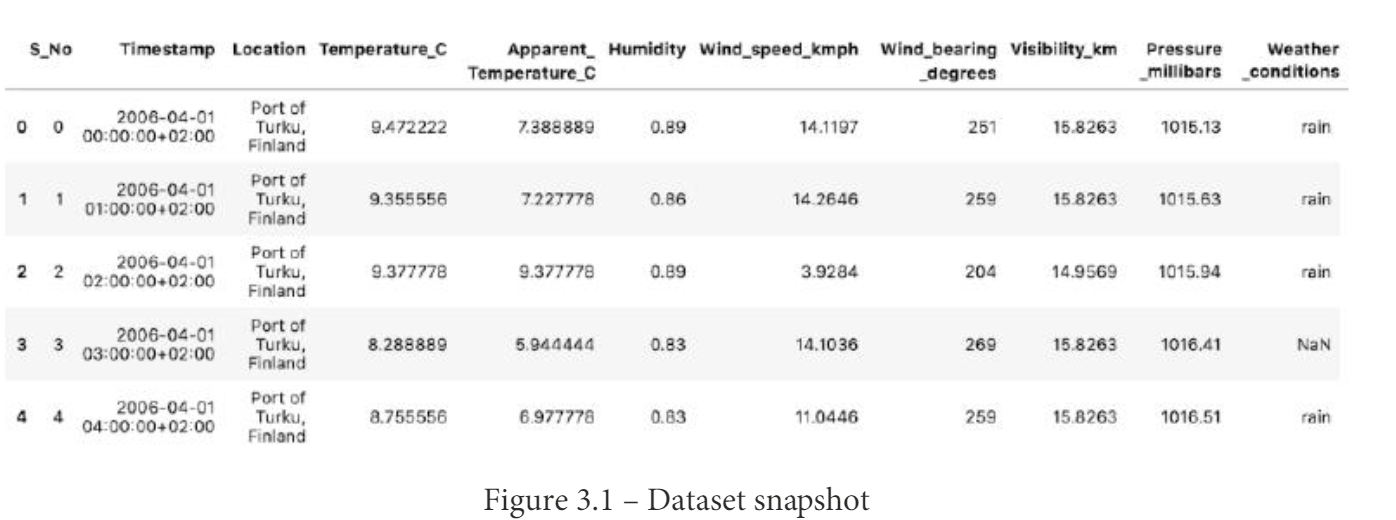

En évaluant les données, nous pouvons classer le problème commercial comme suit :

* Type de modèle : afin d'économiser 20 % des coûts d'exploitation au port de Turku, un modèle d'apprentissage supervisé est nécessaire pour prédire en classant s'il va pleuvoir ou non pluie. Les données sont étiquetées et la colonne Conditions météorologiques indique si un événement a enregistré de la pluie, de la neige ou des conditions claires. Cela peut être encadré ou renommé en pluie ou pas de pluie et utilisé pour effectuer une classification binaire. Par conséquent, il est simple de résoudre le problème métier avec une approche d'apprentissage supervisé.

* Approche MLOps : en observant l'énoncé du problème et les données, voici les faits : 

* (a) Données : les données d'apprentissage sont de 10,7 Mo. La taille des données est raisonnablement petite (elle ne peut pas être considérée comme des données volumineuses). 

* (b) Opérations : nous devons former, tester, déployer et surveiller un modèle ML pour prévoir la météo au port de Turku toutes les heures (4 heures en avance) lorsque de nouvelles données sont enregistrées. 

* (c) Taille de l'équipe : une petite/moyenne équipe de scientifiques des données, pas d'ingénieurs DevOps.


Sur la base des faits précédents, nous pouvons classer les opérations en petites équipes ; il n'y a pas besoin de traitement de données massives et l'équipe est petite et agile. Nous allons maintenant examiner quelques outils appropriés pour mettre en œuvre les opérations nécessaires à la résolution du problème métier. Pour nous permettre d'avoir une compréhension globale de la mise en œuvre de MLOps, nous allons implémenter les problèmes métier à l'aide de deux outils différents simultanément :

* Azure Machine Learning (Microsoft Azure)
* MLfloow (un outil open source cloud et indépendant de la plate-forme)


Nous utilisons ces deux outils pour voir comment les choses fonctionnent à partir d'une approche purement basée sur le cloud et à partir d'une approche open source / agnostique du cloud. Toutes les opérations de code et CI/CD seront gérées et orchestrées à l'aide d'Azure DevOps, comme le montre la figure 3.2 :


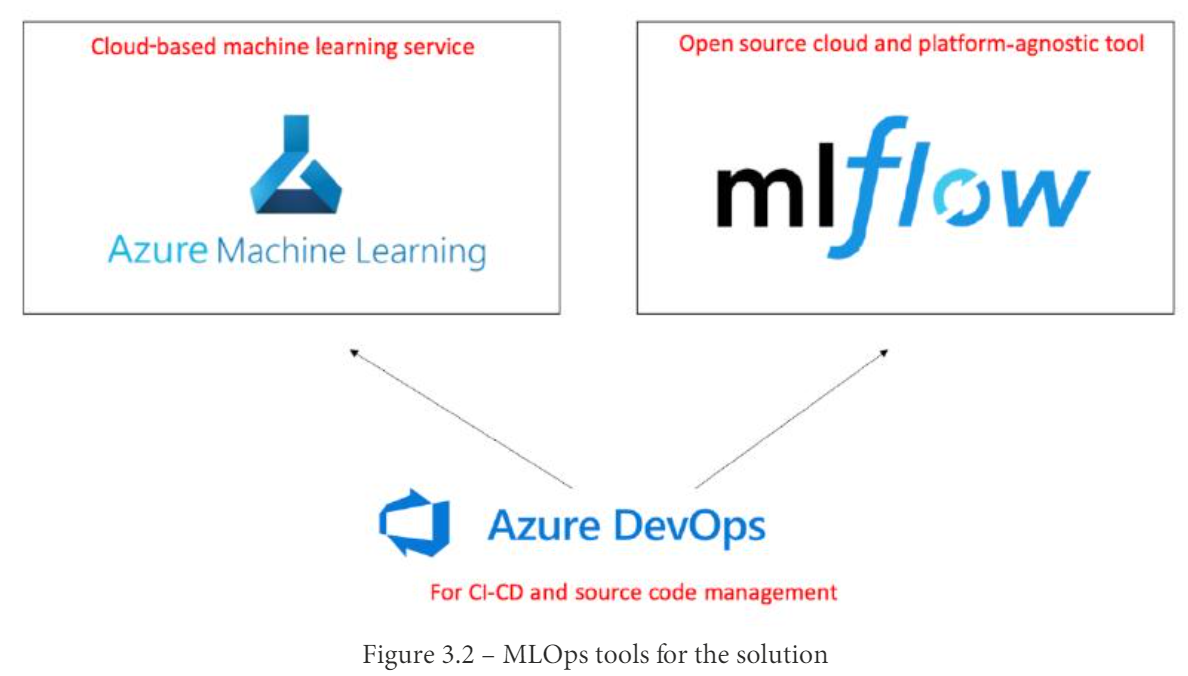

Maintenant, nous allons mettre en place les outils et les ressources nécessaires pour mettre en œuvre la solution au problème métier. Comme nous utiliserons Python comme langage de programmation principal, l'installation de Python 3 sur votre système d'exploitation Mac, Linux ou Windows est une condition préalable.

## Configuration des ressources et des outils 

Si ces outils sont déjà installés et configurés sur votre PC, n'hésitez pas à sauter cette section ; sinon, suivez les instructions détaillées pour les faire fonctionner

## Installation de MLFlow

Nous commençons par installer MLflow, qui est une plate-forme open source pour la gestion du cycle de vie de ML, y compris l'expérimentation, la reproductibilité, le déploiement et un registre de modèles central. Pour installer MLflow, accédez à votre terminal et exécutez la commande suivante


    pip3 install mlflow



## Azure Machine Learnin

Azure Machine Learning fournit une plateforme de ML basée sur le cloud pour la formation, le déploiement et la gestion des modèles de ML. 

Ce service est disponible sur Microsoft Azure, le pré-requis est donc d'avoir un abonnement gratuit à Microsoft Azure. Veuillez créer un compte gratuit avec environ 170 $ de crédit, ce qui est suffisant pour mettre en œuvre la solution, ici : https://azure.microsoft.com/. Lorsque vous avez accès/un abonnement à Azure, passez à la section suivante pour faire fonctionner Azure Machine Learning.

## Création d'un groupe de ressources

Un groupe de ressources est un ensemble de ressources associées pour une solution Azure. C'est un conteneur qui immobilise toutes les ressources liées à un service ou à une solution. 

La création d'un groupe de ressources facilite l'accès et la gestion d'une solution. Commençons par créer votre propre groupe de ressources :

* 1. Ouvrez le portail Azure.
* 2. Accédez au menu du portail (allez à la page d'accueil du portail si vous n'y êtes pas par défaut) et survolez l'icône du groupe de ressources dans la section de navigation. Un bouton Créer apparaîtra ; cliquez dessus pour créer un nouveau groupe de ressources :

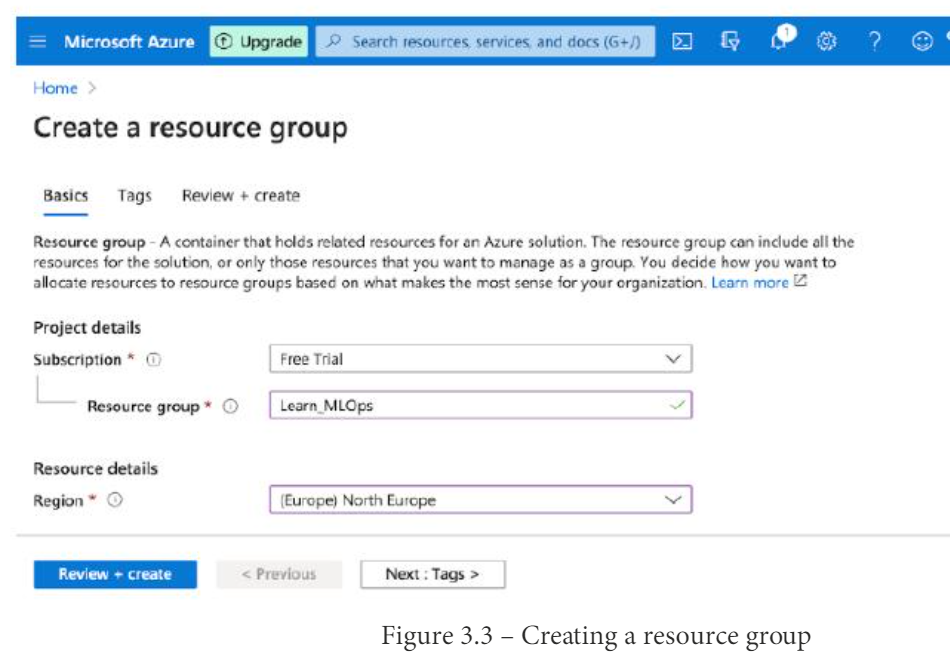

3. Créez un groupe de ressources avec le nom de votre choix (Learn_MLOps est recommandé), comme le montre la figure 3.3.

4. . Sélectionnez une région proche de chez vous pour obtenir des performances et des prix optimaux. Par exemple, dans la figure 3.3, un groupe de ressources nommé Learn MLOps et region (Europe) North Europe est prêt à être créé. Après avoir cliqué sur le bouton Réviser + Créer et qu'Azure valide la demande, le bouton Créer nal apparaîtra. Le bouton nal Create doit être enfoncé pour créer le nouveau groupe de ressources

Lorsque le groupe de ressources est examiné et créé, vous pouvez configurer et gérer tous les services liés à la solution ML dans ce groupe de ressources. Le groupe de ressources nouvellement créé sera répertorié dans la liste des groupes de ressources

## Création d'un espace de travail Azure Machine Learning

Un espace de travail ML est un hub central pour le suivi et la gestion de votre formation ML, le déploiement et la surveillance des expériences. 

Pour créer un espace de travail Azure Machine Learning, accédez au menu du portail Azure, cliquez sur Créer une ressource, puis recherchez Machine Learning et sélectionnez-le. Vous verrez l'écran suivant


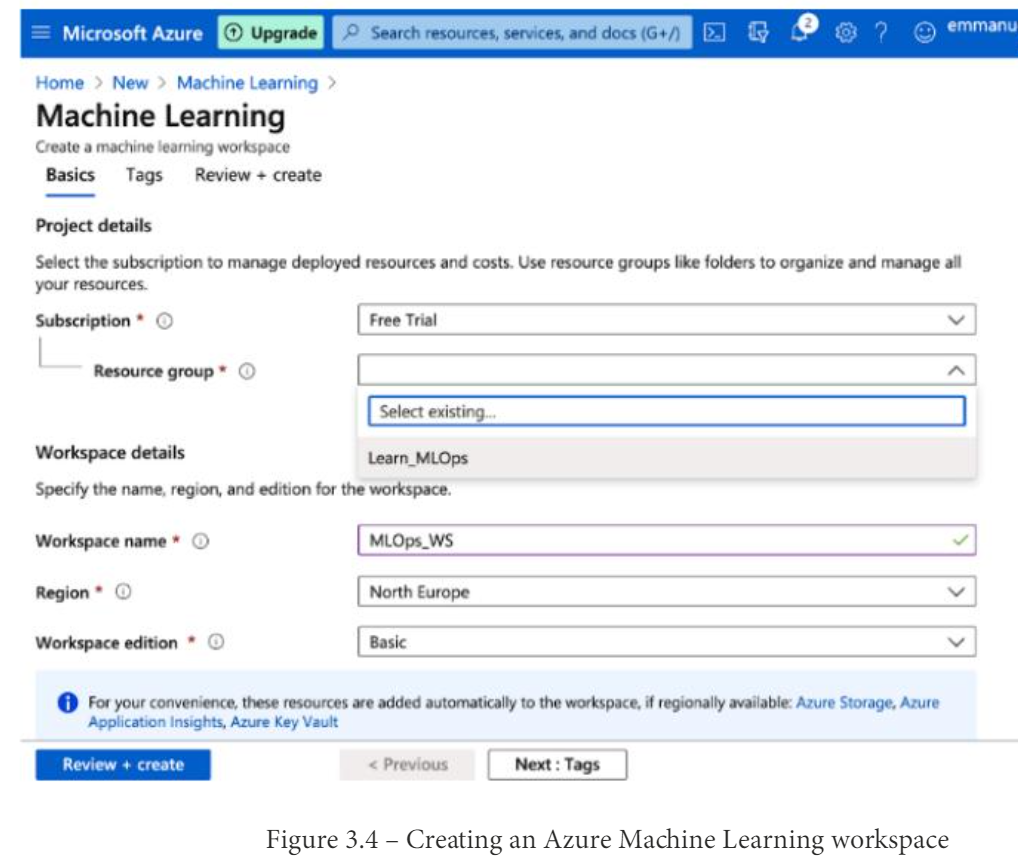

Nommez l'espace de travail avec le nom de votre choix (par exemple, nous l'avons nommé MLOps_WS dans la figure 3.4). Sélectionnez le groupe de ressources que vous avez créé précédemment pour lui lier ce service ML (Learn_MLOps est sélectionné dans la figure 3.4). Enfin, appuyez sur le bouton Review + create et vous serez redirigé vers un nouvel écran avec le bouton final Create. Appuyez sur le bouton Final Create pour créer votre espace de travail Azure Machine Learning.

Après la création de l'espace de travail Azure Machine Learning (Learn_MLOps), la plateforme Azure déploiera toutes les ressources dont ce service a besoin. Les ressources déployées avec l'instance Azure Machine Learning (Learn_MLOps), telles que Blob Storage, Key Vault et Application Insights, sont provisionnées et liées à l'espace de travail. Ces ressources seront consommées ou utilisées via l'espace de travail et le SDK


Vous pouvez trouver des instructions détaillées sur la création d'une instance Azure Machine Learning ici : https://docs.microsoft.com/en-us/azure/machine-learning/how-to-manage-workspace

## Installez Azure Machine Learning SDK

Go sur le terminal ou la ligne de commande de votre PC et installez Azure Machine Learning SDK, qui sera largement utilisé dans le code pour orchestrer l'expérience. Pour l'installer, exécutez la commande suivante :


    pip3 install --upgrade azureml-sdk

Vous pouvez trouver des instructions détaillées ici : https://docs.microsoft.com/en-us/python/api/overview/azure/ml/install?view=azure-ml-py

## Azure DevOps

Tout le code source et les opérations liées à CI/CD seront gérés et orchestrés à l'aide d'Azure DevOps. Le code que nous gérons dans le référentiel dans Azure DevOps sera utilisé pour former, déployer et surveiller les modèles ML activés par les pipelines CI/CD. Commençons par créer un abonnement Azure DevOps:

* 1. Créez un compte gratuit sur dev.azure.com. Un compte gratuit peut être créé à l'aide d'un compte Microsoft ou GitHub préexistant.

2. Créez un projet nommé Learn_MLOps (rendez-le public ou privé selon vos préférences).

3. Allez dans la section repos. Dans la section Importer un référentiel, appuyez sur le bouton Importer

4. Importez un référentiel à partir d'un projet GitHub public à partir de ce référentiel : https://github.com/PacktPublishing/EngineeringMLOps (comme illustré à la figure 3.5) :

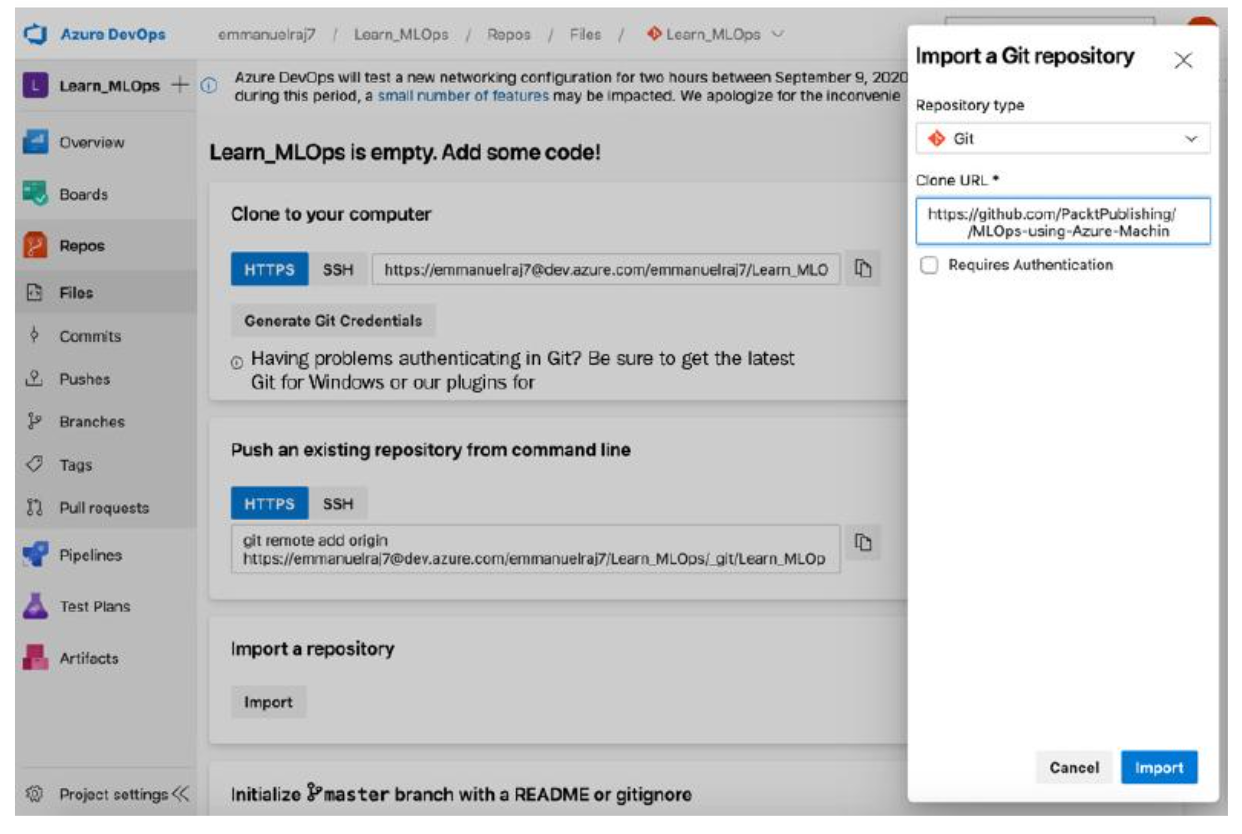

Après l'importation du référentiel GitHub, les fichiers du référentiel importé seront affichés

## JupyterHub

Enfin, nous aurons besoin d'un outil interactif d'analyse et de visualisation des données pour traiter les données à l'aide de notre code. Pour cela, nous utilisons JupyterHub. Il s'agit d'un outil commun de science des données largement utilisé par les scientifiques des données pour traiter les données, visualiser les données et entraîner des modèles de ML. Pour l'installer, suivez deux étapes simples:

* 1. Installez JupyterHub via la ligne de commande sur votre PC :


    python3 -m pip install jupyterhub

* 2. Installer Anaconda.Anaconda est nécessaire car il installe les dépendances, les environnements de configuration et les services pour prendre en charge JupyterHub. Téléchargez Anaconda et installez-le selon les instructions détaillées ici : https://docs.anaconda.com/anaconda/install/. Maintenant que nous sommes configurés pour l'implémentation pratique, regardons ce qu'il faut pour gérer un bon code et données

## 10 principes de gestion de code source pour ML

Voici 10 principes qui peuvent être appliqués à votre code pour garantir la qualité, la robustesse et l'évolutivité de votre code :

* Modularité : il est préférable d'avoir un code modulaire qu'un gros morceau. La modularité encourage la réutilisation et facilite la mise à niveau en remplaçant les composants requis. Pour éviter la complexité et les répétitions inutiles, suivez cette règle d'or :


    Au moins deux composants ML ne doivent être appariés que lorsque l'un d'eux
    utilise l'autre. Si aucun d'entre eux ne s'utilise l'un l'autre,
    l'appariement doit être évité. Un composant ML qui n'est pas étroitement
    associé à son environnement peut être plus facilement modifié ou remplacé
    qu'un composant étroitement associé


* • Fonctions dédiées à une seule tâche : les fonctions sont des blocs de construction importants des pipelines et du système, et ce sont de petites sections de code qui sont utilisées pour effectuer des tâches particulières. Le but des fonctions est d'éviter la répétition des commandes et d'activer le code réutilisable. Ils peuvent facilement devenir un ensemble complexe de commandes pour faciliter les tâches. Pour un code lisible et réutilisable, il est plus efficace d'avoir une seule fonction dédiée à une seule tâche au lieu de plusieurs tâches. Il vaut mieux avoir plusieurs fonctions qu'une seule fonction longue et complexe

* Structuration : les fonctions, les classes et les instructions doivent être structurées sous une forme lisible, modulaire et concise. Personne ne veut voir une erreur comme l'erreur 300. Structurer des blocs de code et essayer de limiter les niveaux maximum d'indentation pour les fonctions et les classes peut améliorer la lisibilité du code

* Code propre : si vous devez expliquer le code, ce n'est pas si bon que ça. Le code propre est explicite. Il se concentre sur une haute lisibilité, une modularité optimale, une réutilisation, une non-répétabilité et des performances optimales. Un code propre réduit le coût de maintenance et de mise à niveau de vos pipelines ML. Il permet à une équipe de fonctionner efficacement et peut être étendu à d'autres développeurs. Pour comprendre cela en profondeur, lisez Clean Code: A Handbook of Agile Software Craftsmanship par Robert C Martin

* Tests : Il est vital d'assurer la robustesse d'un système, et les tests jouent un rôle important à cet égard. En général, les tests s'étendent aux tests unitaires et aux tests d'acceptation. Les tests unitaires sont une méthode par laquelle les composants du code source sont testés pour la robustesse avec des données forcées et des méthodes d'utilisation pour déterminer si le composant est compatible avec le système de production. Les tests d'acceptation sont effectués pour tester l'ensemble du système afin de s'assurer que le système répond aux exigences des utilisateurs ; les ux commerciaux de bout en bout sont vérifiés dans des scénarios en temps réel. Le test est vital pour assurer le fonctionnement efficace du code : « s'il n'est pas testé, il est cassé.

* Contrôle de version (code, données et modèles) : Git est utilisé pour le contrôle de version du code dans les systèmes ML. Le but du contrôle de version est de s'assurer que tous les membres de l'équipe travaillant sur le système ont accès au code à jour et que le code n'est pas perdu en cas de panne matérielle. Une règle de travail avec Git devrait être de ne pas casser le maître (branche).

 Cela signifie que lorsque vous avez du code fonctionnel dans le référentiel et que vous ajoutez de nouvelles fonctionnalités ou apportez des améliorations, vous le faites dans une branche de fonctionnalité, qui est fusionnée avec la branche principale lorsque le code fonctionne et est révisé. Les branches doivent recevoir un nom descriptif court, tel que feature/label-encodeur. Les directives de dénomination et d'approbation des succursales doivent être correctement communiquées et convenues avec l'équipe afin d'éviter toute complexité et tout conflit inutile. 
 
 La revue de code est effectuée avec des demandes d'extraction vers le référentiel du code. Habituellement, il est préférable de revoir le code en petits ensembles, moins de 400 lignes. En pratique, cela signifie souvent un module ou un sous-module à la fois. Le versionnage des données est essentiel pour les systèmes ML car il nous aide à garder une trace des données qui ont été utilisées pour une version particulière du code afin de générer un modèle. Les données de contrôle de version peuvent permettre de reproduire des modèles et de se conformer aux besoins de l'entreprise et à la loi. 
 
 Nous pouvons toujours revenir en arrière et voir la raison de certaines actions prises par le système de ML. De même, la gestion des versions des modèles (artefacts) est importante pour suivre quelle version d'un modèle a généré certains résultats ou actions pour le système ML. Nous pouvons également suivre ou enregistrer les paramètres utilisés pour l'apprentissage d'une certaine version du modèle. De cette manière, nous pouvons activer la traçabilité de bout en bout pour les artefacts de modèle, les données et le code. 
 
 Le contrôle de version pour le code, les données et les modèles peut améliorer un système de ML avec une grande transparence et efficacité pour les personnes qui le développent et le maintiennent

 * Logging : En production, un enregistreur est utile car il permet de surveiller et d'identifier des informations importantes. Les instructions d'impression sont bonnes pour les tests et le débogage, mais pas idéales pour la production. L'enregistreur contient des informations, en particulier des informations système, des avertissements et des erreurs, qui sont très utiles dans la surveillance des systèmes de production.

 * Gestion des erreurs : la gestion des erreurs est vitale pour gérer les cas extrêmes, en particulier ceux qui sont difficiles à anticiper. Il est recommandé d'intercepter et de gérer les exceptions même si vous pensez que vous n'en avez pas besoin, car mieux vaut prévenir que guérir. La journalisation combinée à la gestion des exceptions peut être un moyen efficace de traiter les cas extrêmes.

 * Lisibilité : la lisibilité du code permet le transfert d'informations, l'efficacité du code et la maintenabilité du code. Cela peut être réalisé en suivant des principes tels que les pratiques de codage standard de l'industrie telles que PEP-8 (https://www.python.org/dev/peps/pep-0008/) ou le style standard JavaScript (selon le langage vous utilisez). La lisibilité est également augmentée en utilisant des docstrings. Une docstring est un texte écrit au début d'une fonction, par exemple, décrivant ce qu'elle fait et éventuellement ce qu'elle prend en entrée. Dans certains cas, il suffit d'avoir une explication simple


Commentaires et documentation : les commentaires et la documentation sont essentiels pour maintenir un code durable. Il n'est pas toujours possible d'expliquer clairement le code. Les commentaires peuvent être utiles dans de tels cas pour éviter toute confusion et expliquer le code. 

Les commentaires peuvent transmettre des informations telles que des informations sur le droit d'auteur, l'intention, la clarification du code, les avertissements possibles et l'élaboration du code. Une documentation élaborée du système et des modules peut permettre à une équipe de fonctionner efficacement, et le code et les actifs peuvent être étendus à d'autres développeurs. Pour la documentation, des outils open source sont disponibles pour documenter les API telles que Swagger (https://swagger.io) et Read the Docs (https://readthedocs.org). L'utilisation des bons outils de documentation peut permettre l'efficacité et la standardisation des connaissances pour les développeurs

## Qu'est-ce que de bonnes données pour le ML ? 

De bons modèles de ML sont le résultat d'une formation sur des données de bonne qualité. Avant de procéder à la formation ML, un pré-requis est d'avoir des données de bonne qualité. Par conséquent, nous devons traiter les données pour augmenter leur qualité. Il est donc essentiel de déterminer la qualité des données. Cinq caractéristiques nous permettront de discerner la qualité des données, comme suit :

* Précision : la précision est une caractéristique cruciale de la qualité des données, car des données inexactes peuvent entraîner de mauvaises performances du modèle ML et des conséquences dans la vie réelle. Pour vérifier l'exactitude des données, confirmer si les informations représentent une situation réelle ou non. 

* Intégralité : dans la plupart des cas, les informations incomplètes sont inutilisables et peuvent entraîner des résultats incorrects si un modèle de ML est formé dessus. Il est essentiel de vérifier l'exhaustivité des données.

* Fiabilité : Des contradictions ou des doublons dans les données peuvent conduire à un manque de fiabilité des données. La fiabilité est une caractéristique vitale; il est essentiel de faire confiance aux données, principalement lorsqu'elles sont utilisées pour prendre des décisions concrètes à l'aide du ML. Dans une certaine mesure, nous pouvons évaluer la fiabilité des données en examinant le biais et la distribution. En cas d'extrémités, les données peuvent ne pas être fiables pour la formation en ML ou peuvent comporter des biais.

* Pertinence : La pertinence des données joue un rôle essentiel dans la contextualisation et la détermination de la collecte d'informations non pertinentes. Disposer de données pertinentes peut permettre de prendre des décisions appropriées dans des contextes réels à l'aide du ML.

* Actualité : les informations obsolètes ou obsolètes coûtent du temps et de l'argent aux entreprises ; disposer d'informations à jour est vital dans certains cas et peut améliorer la qualité des données. Les décisions rendues possibles par le ML à l'aide de données intempestives peuvent être coûteuses et conduire à de mauvaises décisions.



Lorsque ces cinq caractéristiques sont maximisées, cela garantit la meilleure qualité de données. Avec ces principes à l'esprit, examinons la mise en œuvre, là où le code rencontre les données. Tout d'abord, évaluons les données et traitons-les pour les préparer à la formation ML. Pour commencer, clonez le référentiel que vous avez importé dans votre projet Azure DevOps (depuis GitHub)


    git clone https://xxxxxxxxx@dev.azure.com/xxxxx/Learn_MLOps/_git/Learn_MLOps


Ensuite, ouvrez votre terminal et accédez au dossier du référentiel cloné et lancez le serveur JupyterLab pour le traitement des données. Pour ce faire, tapez la commande suivante dans le terminal


    jupyter lab

Cela ouvrira automatiquement une fenêtre dans votre navigateur à l'adresse http://localhost:8888 où vous pourrez coder et exécuter le code sur l'interface JupyterLab. Dans le dossier Code_meets_data_c3, il y a un script Python (dataprocessing.py) et un bloc-notes .ipynb (dataprocessing.ipynb); n'hésitez pas à exécuter l'un de ces fichiers ou à créer un nouveau bloc-notes et à suivre les étapes à venir. 

Nous effectuerons le calcul des tâches décrites dans la figure 3.6. Le traitement des données sera effectué localement sur votre PC, suivi de la formation ML, du déploiement et de la surveillance des cibles de calcul dans le cloud. Il s'agit d'acquérir une expérience de la mise en œuvre de modèles dans diverses configurations. 

Dans la suite de ce chapitre, nous allons faire du traitement des données (localement) pour obtenir les données de la meilleure qualité afin de faire la formation ML (dans le cloud, qui est décrit dans le chapitre suivant).

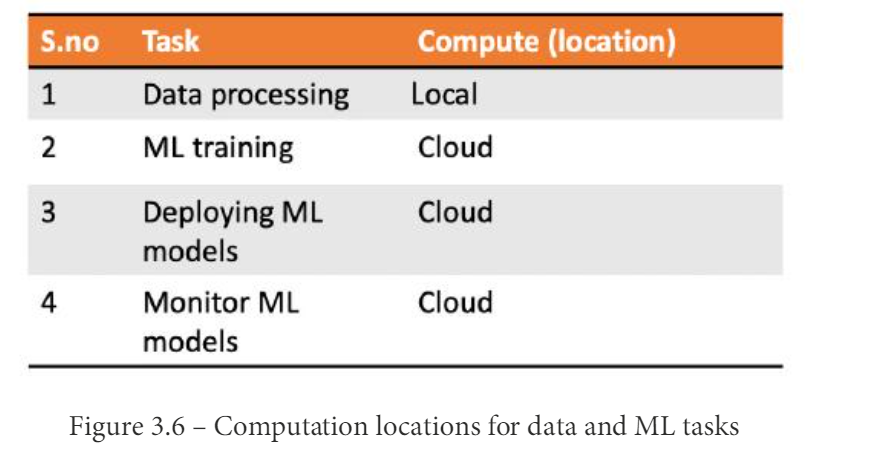

Pour traiter les données brutes et les préparer pour le ML, vous effectuerez le calcul et le traitement des données sur votre PC local. Nous commençons par installer et importer les packages requis et importer l'ensemble de données brutes (comme indiqué dans les scripts dataprocessing.ipynb et .py). Les instructions Python dans les notebooks doivent être exécutées dans le notebook existant

In [ ]:
#! pip3 install --upgrade azureml-sdk

In [ ]:
#! pip3 install mlflow

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/EngineeringMLOps/master/03_Code_Meets_Data/Dataset/weather_dataset_raw.csv')

Avec cela, vous avez importé l'ensemble de données dans un DataFrame pandas, df, pour un traitement ultérieur.

## Prétraitement des données

Les données brutes ne peuvent pas être directement transmises au modèle ML à des fins de formation. Nous devons affiner ou prétraiter les données avant d'entraîner le modèle ML. Pour analyser davantage les données importées, nous effectuerons une série d'étapes pour prétraiter les données dans une forme appropriée pour la formation ML. Nous commençons par évaluer la qualité des données pour en vérifier l'exactitude, l'exhaustivité, la fiabilité, la pertinence et l'actualité. Après cela, nous calibrons les données requises et codons le texte en données numériques, ce qui est idéal pour la formation en ML. Enfin, nous analyserons les corrélations et les séries chronologiques, et filtrerons les données non pertinentes pour l'entraînement des modèles de ML

## Évaluation de la qualité des données 

Pour évaluer la qualité des données, nous recherchons l'exactitude, l'exhaustivité, la fiabilité, la pertinence et l'actualité. Tout d'abord, vérifions si les données sont complètes et fiables en évaluant les formats, les statistiques cumulées et les anomalies telles que les données manquantes. Nous utilisons les fonctions pandas comme suit :

In [ ]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Certaines observations peuvent être faites pour conclure que les données sont cohérentes et pertinentes car elles représentent des statistiques réelles telles qu'une température moyenne de ~ 11 C et une vitesse du vent de ~ 10 km/h. Les températures minimales en Finlande ont tendance à atteindre environ ~-21 °C et la visibilité moyenne est de 10 km. Des faits comme ceux-ci décrivent les conditions de pertinence et d'origine des données. Maintenant, observons les formats de colonnes

In [ ]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

La plupart des colonnes sont numériques (float et int), comme prévu. La colonne Horodatage est au format objet, qui doit être remplacée par le format DateHeure

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

En utilisant la fonction to_datetime de pandas, nous convertissons l'horodatage au format DateTime. Voyons ensuite s'il existe des valeurs nulles. Nous utilisons la fonction isnull des pandas pour vérifier ceci :

In [ ]:
df.isnull().values.any()

True

Lors de la vérification des valeurs nulles, si des valeurs nulles sont découvertes, l'étape suivante consiste à calibrer les données manquantes.

## Calibrer les données manquantes 

Il n'est pas idéal d'avoir des valeurs manquantes dans les données car c'est un signe de mauvaise qualité des données. Les données ou valeurs manquantes peuvent être remplacées à l'aide de diverses techniques sans compromettre l'exactitude et la fiabilité des données. Après avoir inspecté les données sur lesquelles nous avons travaillé, des valeurs manquantes sont observées. Nous utilisons la méthode de remplissage Forward pour gérer les données manquantes :

In [ ]:
df['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

Les valeurs NaN ou nulles n'ont été observées que dans la colonne Weather_conditions. Nous remplaçons les valeurs NaN en utilisant la méthode fillna() de pandas et la méthode forward fill (ffill). Comme le temps est progressif, il est probable qu'il reproduise l'événement précédent dans les données. Par conséquent, nous utilisons la méthode forward fill, qui réplique la dernière valeur non nulle observée jusqu'à ce qu'une autre valeur non nulle soit rencontrée

## Codage des étiquettes

Comme les machines ne comprennent pas le langage ou le texte humain, tout le texte doit être converti en nombres. Avant cela, traitons le texte. Nous avons une colonne Weather_conditons dans le texte avec des valeurs ou des étiquettes telles que pluie, neige et clair. Ces valeurs sont trouvées à l'aide de la fonction value_counts() de pandas, comme suit :

In [ ]:
df['Weather_conditions'].value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

Weather_conditions peut être simplifié en catégorisant le libellé de la colonne en deux libellés, rain ou no_rain. La prévision dans ces deux catégories nous permettra de résoudre le problème commercial de l'entreprise de fret

In [ ]:
df["Weather_conditions"].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

Cela remplacera les valeurs snow et clear par no_rain car les deux conditions n'impliquent pas de conditions de pluie au port. Maintenant que les étiquettes sont traitées, nous pouvons convertir la colonne Weather_conditions en une forme ou des nombres lisibles par machine à l'aide de l'encodage des étiquettes. L'encodage d'étiquettes est une méthode de conversion de valeurs catégorielles en une forme ou des nombres lisibles par machine en attribuant à chaque catégorie une valeur unique. Comme nous n'avons que deux catégories, rain et no_rain, l'encodage d'étiquette peut être efficace car il convertit ces valeurs en 0 et 1. S'il y a plus de deux valeurs, l'encodage one-hot est un bon choix car l'attribution de nombres incrémentiels aux catégories les variables peuvent donner aux variables une priorité plus élevée ou un biais numérique pendant la formation. L'encodage à chaud empêche les biais ou les préférences plus élevées pour n'importe quelle variable, garantissant des privilèges neutres à chaque valeur des variables catégorielles. Dans notre cas, comme nous n'avons que deux variables catégorielles, nous effectuons l'encodage des étiquettes à l'aide de scikit-learn comme suit

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = df['Weather_conditions']
y=le.fit_transform(y)

Ici, nous importons la fonction LabelEncoder(), qui encode la colonne Weather_conditions en 0 et 1 en utilisant la méthode fit_transform(). Nous pouvons le faire en remplaçant la colonne textuelle précédente par une étiquette codée ou sous forme lisible par machine dans la colonne Weather_condition comme suit :

In [ ]:
y = pd.DataFrame(data=y, columns=["Current_weather_condition"])
df = pd.concat([df,y], axis=1)
df.drop(['Weather_conditions'], axis=1, inplace=True)

Ici, nous concaténons notre nouvelle colonne Weather_condition codée par étiquette ou lisible par machine au DataFrame et supprimons la colonne Weather_conditions textuelle ou non lisible par machine précédente. Les données sont maintenant sous une forme lisible par machine et prêtes pour un traitement ultérieur. Vous pouvez vérifier les données transformées en exécutant df.head() dans le bloc-notes (facultatif)

## Nouvelle fonctionnalité - Future_weather_condition

Comme nous sommes chargés de prévoir les conditions météorologiques 4 heures dans le futur, nous créons une nouvelle fonctionnalité nommée Future_weather_condition en changeant Current_weather_condition de quatre lignes, car chaque ligne est enregistrée avec un décalage d'une heure.Future_weather_condition est la étiquette des conditions météorologiques futures 4 heures à l'avance. Nous utiliserons cette nouvelle fonctionnalité comme variable dépendante pour prévoir à l'aide de ML

In [ ]:
df['Future_weather_condition'] = df.Current_weather_condition.shift(4, axis = 0)
df.dropna(inplace=True)

Nous utiliserons la fonction dropna () de pandas sur le DataFrame pour supprimer ou supprimer les valeurs nulles, car certaines lignes auront des valeurs nulles en raison du déplacement vers une nouvelle colonne

## Corrélations de données et filtrage

Maintenant que les données sont entièrement lisibles par machine, nous pouvons observer les corrélations en utilisant le coefficient de corrélation de Pearson pour observer comment chaque colonne est liée aux autres colonnes. 

La corrélation des données et des fonctionnalités est une étape vitale avant la sélection des fonctionnalités pour l'entraînement du modèle ML, en particulier lorsque les fonctionnalités sont continues, comme dans notre cas. Le coefficient de corrélation de Pearson est une corrélation linéaire statistique entre chaque variable (X et y) qui produit une valeur comprise entre +1 et -1. Une valeur de +1 est une corrélation linéaire positive, -1 est une corrélation linéaire négative et 0 n'est pas une corrélation linéaire. Il peut être utilisé pour comprendre la relation entre les variables continues, même s'il convient de noter que la corrélation de Pearson ne signifie pas la causalité. Nous pouvons observer les coefficients de corrélation de Pearson pour nos données en utilisant des pandas comme suit

In [ ]:
df.corr(method ='pearson')

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
S_No,1.000000,0.025460,0.026591,0.041773,-0.006393,-0.027760,0.109075,0.016650,0.083009,0.082774
Temperature_C,0.025460,1.000000,0.992629,-0.632254,0.008959,0.029995,0.392876,-0.005446,0.378350,0.348167
Apparent_Temperature_C,0.026591,0.992629,1.000000,-0.602570,-0.056646,0.029039,0.381749,-0.000218,0.383877,0.357662
Humidity,0.041773,-0.632254,-0.602570,1.000000,-0.224957,0.000720,-0.369223,0.005451,-0.130966,-0.096626
Wind_speed_kmph,-0.006393,0.008959,-0.056646,-0.224957,1.000000,0.103815,0.100745,-0.049264,0.094135,0.066179
Wind_bearing_degrees,-0.027760,0.029995,0.029039,0.000720,0.103815,1.000000,0.047567,-0.011653,0.059540,0.061013
Visibility_km,0.109075,0.392876,0.381749,-0.369223,0.100745,0.047567,1.000000,0.059815,0.233356,0.227457
Pressure_millibars,0.016650,-0.005446,-0.000218,0.005451,-0.049264,-0.011653,0.059815,1.000000,0.040329,0.038392
Current_weather_condition,0.083009,0.378350,0.383877,-0.130966,0.094135,0.059540,0.233356,0.040329,1.000000,0.808768
Future_weather_condition,0.082774,0.348167,0.357662,-0.096626,0.066179,0.061013,0.227457,0.038392,0.808768,1.000000


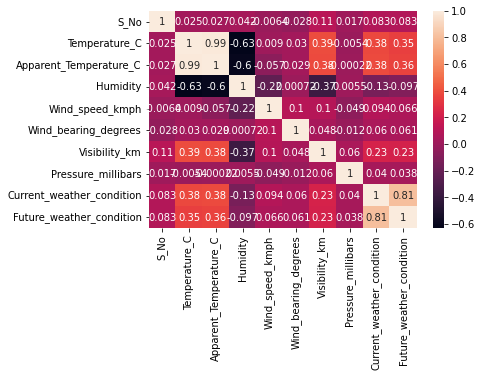

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

À partir de la carte thermique de la figure, nous pouvons voir que le coefficient de température et de température apparente_C est de 0,99. S_No (numéro de série) est une valeur continue, qui ressemble plus ou moins à un index incrémentiel pour un DataFrame et peut être ignoré ou filtré car il ne fournit pas une grande valeur. Par conséquent, à la fois Apparent_Temperature et S_No sont supprimés ou filtrés. Observons maintenant notre variable dépendante, Future_weather_condition, et sa corrélation avec d'autres variables indépendantes

In [ ]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

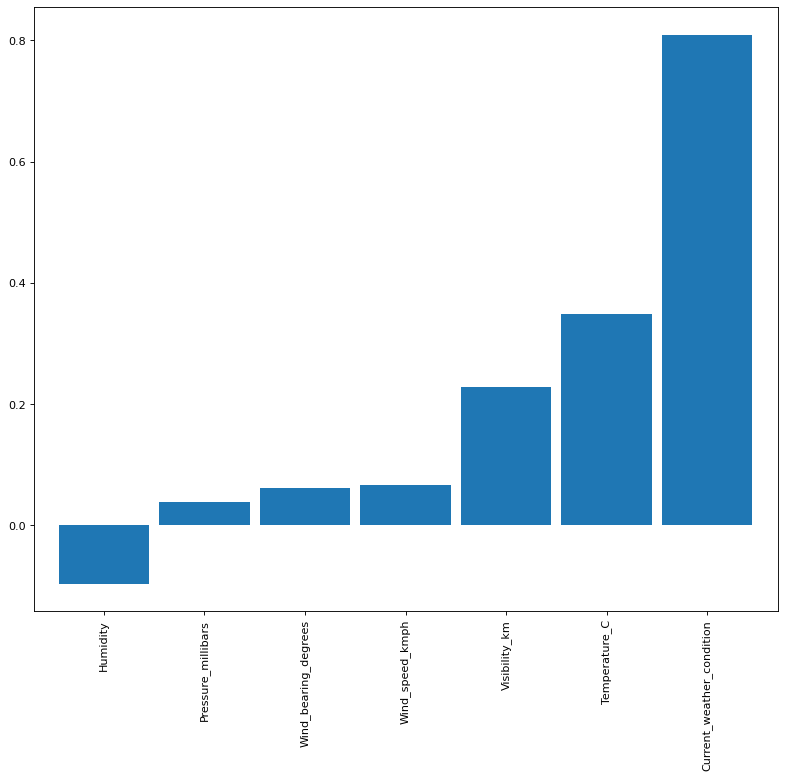

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Future_weather_condition'].sort_values(ascending=True).drop(['Future_weather_condition']).plot(kind='bar', width=0.9)

Tout ce qui se situe entre 0,5 et 1,0 a une corrélation positive et tout ce qui se situe entre -0,5 et -1,0 a une corrélation négative. À en juger par le graphique, il existe une corrélation positive avec Current_weather_condition, et Temperature_C est également positivement corrélée avec Future_weather_c

## Analyse de séries temporelles

La température étant une variable continue, il convient d'observer sa progression dans le temps. Nous pouvons visualiser un tracé de série temporelle en utilisant matplotlib comme suit :

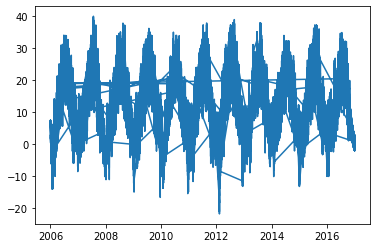

In [ ]:
time = df['Timestamp']
temp = df['Temperature_C']

## plot graph
plt.plot(time, temp)
plt.show()

Après avoir évalué la progression de la série chronologique de la température sur la figure, nous pouvons voir qu'elle décrit un modèle stationnaire puisque la moyenne, la variance et la covariance sont observées comme étant stationnaires dans le temps. Les comportements stationnaires peuvent être des tendances, des cycles, des marches aléatoires ou une combinaison des trois. Cela a du sens, car la température change au fil des saisons et suit les modèles saisonniers. Ceci nous amène à la fin de l'analyse et du traitement des données ; nous sommes maintenant prêts à enregistrer les données traitées dans l'espace de travail avant de procéder à l'apprentissage du modèle ML

In [ ]:
# Save processed dataset 
df.to_csv('weather_dataset_processed.csv',index=False)

## Enregistrement et versionnage des données 

Il est essentiel d'enregistrer et de versionner les données dans l'espace de travail avant de commencer la formation ML, car cela nous permet de remonter nos expériences ou nos modèles ML jusqu'à la source de données utilisée pour la formation des modèles. revenir en arrière à tout moment, reproduire la formation d'un modèle ou expliquer le fonctionnement du modèle selon les données d'inférence ou de test pour expliquer le modèle ML. Pour ces raisons, nous allons enregistrer les données traitées et les versionner pour les utiliser pour notre pipeline ML. Nous allons enregistrer et versionner les données traitées dans l'espace de travail Azure Machine Learning à l'aide du SDK Azure Machine Learning comme suit

In [ ]:
subscription_id = '---insert your subscription ID here----'
resource_group = 'Learn_MLOps'
workspace_name = 'MLOps_WS'
workspace = Workspace(subscription_id, resource_group, workspace_name)

Récupérez votre ID d'abonnement, resource_group et workspace_name à partir du portail Azure Machine Learning, comme illustré à la Figure 3.11 :

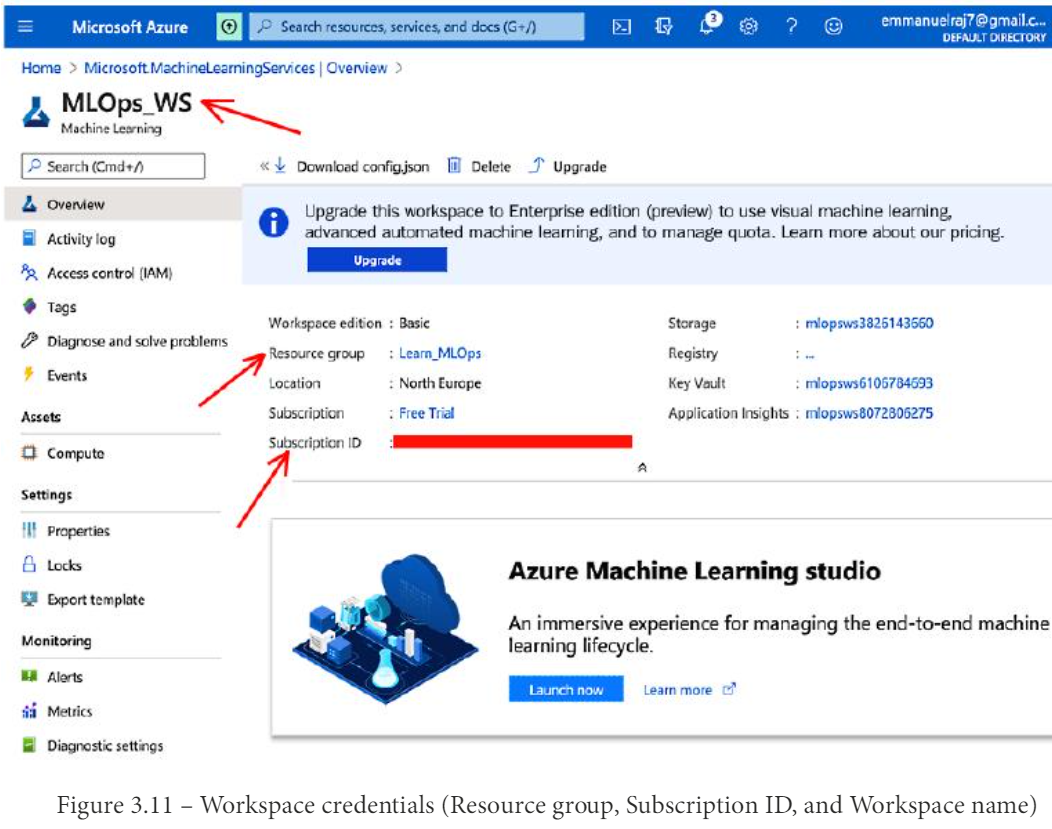

En demandant les informations d'identification de l'espace de travail, un objet de l'espace de travail est obtenu. Lors de l'exécution de la fonction Workspace(), votre notebook sera connecté à la plateforme Azure. Vous serez invité à cliquer sur un lien d'authentification et à fournir un code aléatoire et les détails du compte Azure. Après cela, le script confirmera l'authentification. À l'aide de l'objet espace de travail, nous accédons au magasin de données par défaut et téléchargeons les fichiers de données requis dans le magasin de données sur Azure Blob Storage connecté à l'espace de travail

In [ ]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

# upload the local file from src_dir to the target_path in datastore

datastore.upload(src_dir='Dataset', target_path='data')

dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

Tabular.from_delimited_files() peut provoquer une panne sur les machines Linux ou MacOS sur lesquelles .NET Core 2.1 n'est pas installé. Pour une installation correcte de cette dépendance, suivez ces instructions : https://docs.microsoft.com/en-us/dotnet/core/install/linux. Après avoir exécuté avec succès les commandes précédentes, vous téléchargerez le fichier de données dans le magasin de données et verrez le résultat illustré à la figure 3.12. Vous pouvez prévisualiser l'ensemble de données à partir du magasin de données comme suit :

In [ ]:
# preview the first 3 rows of the dataset from datastore

dataset.take(3).to_pandas_dataframe()

Lorsque les données sont téléchargées dans le magasin de données, nous enregistrerons l'ensemble de données dans l'espace de travail et le versionnerons comme suit :

In [ ]:
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data_portofTurku',
                                 description='processed weather data')

La fonction register(...) enregistre l'ensemble de données dans l'espace de travail, comme illustré à la Figure 3.12. Pour une documentation détaillée, visitez https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-register-datasets#register-datasets :

## Vers le pipeline ML 

Jusqu'à présent, nous avons traité les données en travaillant sur des irrégularités telles que des données manquantes, sélectionné des fonctionnalités en observant des corrélations, créé de nouvelles fonctionnalités et finalement ingéré et versionné les données traitées dans l'espace de travail Machine learning. Il existe deux manières d'alimenter l'ingestion de données pour la formation de modèles de ML dans le pipeline de ML. La première consiste à utiliser le stockage central (où toutes vos données brutes sont stockées) et la seconde à utiliser un magasin de fonctionnalités. Comme la connaissance c'est le pouvoir, apprenons à connaître l'utilisation du magasin de fonctionnalités avant de passer au pipeline ML

## Magasin de fonctionnalités 

Un magasin de fonctionnalités complète le stockage central en stockant des fonctionnalités importantes et en les rendant disponibles pour la formation ou l'inférence. Un magasin de fonctionnalités est un magasin dans lequel vous transformez des données brutes en fonctionnalités utiles que les modèles de ML peuvent utiliser directement pour s'entraîner et déduire pour faire des prédictions. 

Les données brutes proviennent généralement de diverses sources de données, qui sont structurées, non structurées, en streaming, par lots et en temps réel. Tout doit être extrait, transformé (à l'aide d'un pipeline de fonctionnalités) et stocké quelque part, et ce quelque part peut être le magasin de fonctionnalités. Le magasin de fonctionnalités prend ensuite les données et les rend disponibles pour la consommation. Les data scientists ont tendance à dupliquer le travail (en particulier le traitement des données). Cela peut être évité si nous avons un magasin de fonctionnalités centralisé. Le magasin de fonctionnalités permet aux data scientists de partager et de réutiliser ecffiacement des fonctionnalités avec d'autres équipes et ainsi d'augmenter leur productivité car ils n'ont pas à pré-traiter les fonctionnalités à partir de zéro


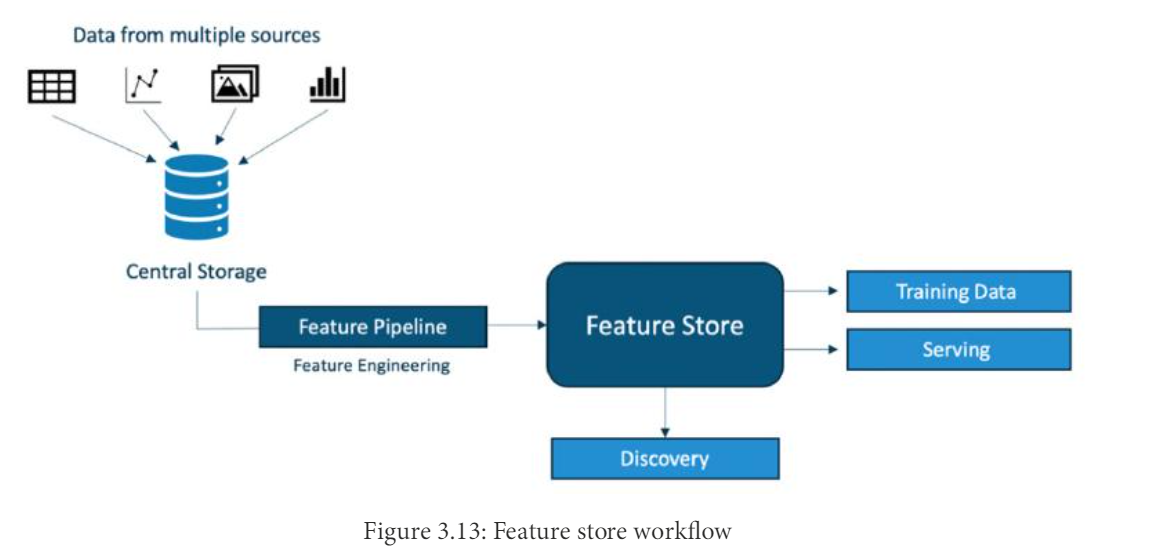

Comme nous pouvons le voir sur la figure 3.13, un magasin de fonctionnalités utilise un pipeline de fonctionnalités connecté à un stockage central (qui stocke les données de plusieurs sources) pour transformer et stocker les données brutes en fonctionnalités utiles pour la formation ML. Les fonctionnalités stockées dans le magasin de fonctionnalités peuvent être récupérées pour la formation, la diffusion ou la découverte d'informations ou de tendances. Voici quelques avantages de l'utilisation d'un magasin de fonctionnalités :

* Ingénierie de fonctionnalités efficace pour les données d'entraînement

* Éviter le prétraitement inutile des données avant la formation
* Éviter l'ingénierie de fonctionnalités répétitive
* Fonctionnalités disponibles pour une inférence rapide (test)
* Prise en charge du système pour la diffusion de caractéristiques
* Analyse exploratoire des données par magasin de fonctionnalités 
* Possibilité de réutiliser les fonctionnalités des modèles
* Requêtes rapides sur les fonctionnalités 
* Reproductibilité des ensembles de données d'entraînement
* Surveillance de la dérive des fonctionnalités en production (nous en apprendrons davantage sur la dérive des fonctionnalités au chapitre 12, Présentation et surveillance des modèles)

* Fonctionnalités disponibles pour la surveillance des données



Il est bon de connaître les avantages d'un magasin de fonctionnalités car il peut être utile pour alimenter le pipeline ML (en particulier l'étape d'ingestion de données), mais ne convient pas à tous les cas. Cela dépend de votre cas d'utilisation. Pour la mise en œuvre de notre cas d'utilisation, nous n'utiliserons pas le magasin de fonctionnalités mais procéderons à la liaison des données directement à partir du stockage central où nous avons prétraité et enregistré les ensembles de données dont nous avons besoin pour la formation et les tests. Avec les données ingérées et versionnées, vous êtes prêt à procéder à la création de votre pipeline de ML. Le pipeline ML permettra d'approfondir l'ingénierie des fonctionnalités, la mise à l'échelle des fonctionnalités, l'organisation de la formation et le test des ensembles de données qui seront utilisés pour former les modèles ML et régler les hyperparamètres pour la formation en apprentissage automatique. Le pipeline et les fonctionnalités de ML seront exécutés sur des ressources de cloud computing, contrairement à localement sur votre ordinateur comme nous l'avons fait dans ce chapitre. Ce sera purement basé sur le cloud

## Résumé

Dans ce chapitre, nous avons appris à identifier une solution de ML appropriée à un problème métier et à catégoriser les opérations pour mettre en œuvre des MLOps appropriés. Nous mettons en place nos outils, nos ressources et notre environnement de développement. 10 principes de gestion du code source ont été discutés, suivis des caractéristiques de qualité des données. 

Félicitations! Jusqu'à présent, vous avez implémenté un élément essentiel du flux de travail MLOps : le traitement des données et l'enregistrement des données traitées dans l'espace de travail. Enfin, nous avons eu un aperçu de l'essentiel du pipeline ML. 

Dans le chapitre suivant, vous ferez la partie la plus excitante de MLOps : construire le pipeline ML. Continuons !